Estudiante: Cristian Rivas

Proyecto 2: Parte II

#### Evaluación de varios modelos


[INFO] Clasificación Multiclase Detectada

Entrenando modelo: Regresión Logística
[Validación Cruzada] Regresión Logística - Accuracy Promedio: 0.59 +/- 0.04
[Evaluación en Prueba] Regresión Logística - Accuracy en Test: 0.62

Matriz de Confusión para Regresión Logística:


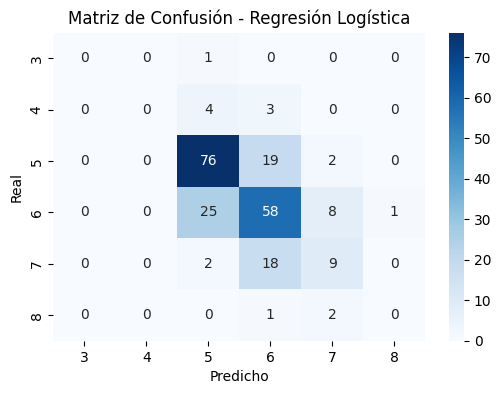


Entrenando modelo: KNN
[Validación Cruzada] KNN - Accuracy Promedio: 0.53 +/- 0.02
[Evaluación en Prueba] KNN - Accuracy en Test: 0.58

Matriz de Confusión para KNN:


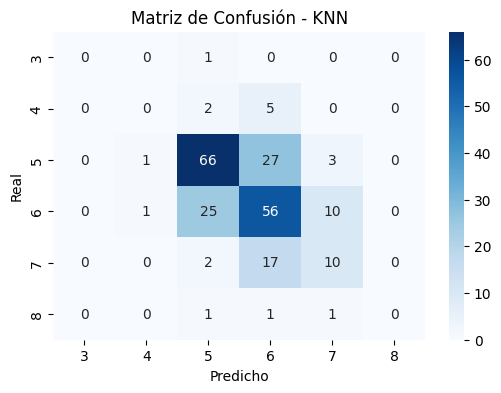


Entrenando modelo: Árbol de Decisión
[Validación Cruzada] Árbol de Decisión - Accuracy Promedio: 0.53 +/- 0.03
[Evaluación en Prueba] Árbol de Decisión - Accuracy en Test: 0.63

Matriz de Confusión para Árbol de Decisión:


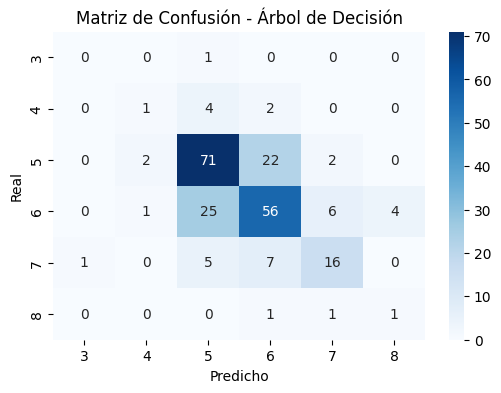


Entrenando modelo: Random Forest
[Validación Cruzada] Random Forest - Accuracy Promedio: 0.64 +/- 0.01
[Evaluación en Prueba] Random Forest - Accuracy en Test: 0.71

Matriz de Confusión para Random Forest:


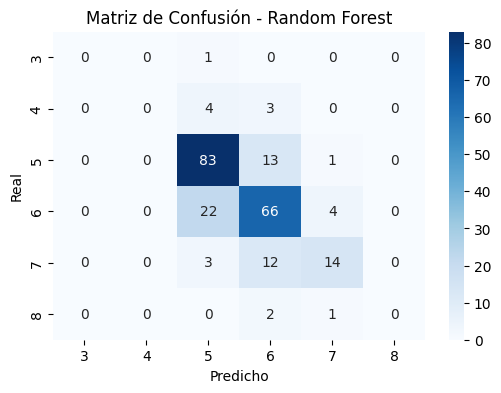


Entrenando modelo: LightGBM
[Validación Cruzada] LightGBM - Accuracy Promedio: 0.62 +/- 0.01
[Evaluación en Prueba] LightGBM - Accuracy en Test: 0.69

Matriz de Confusión para LightGBM:


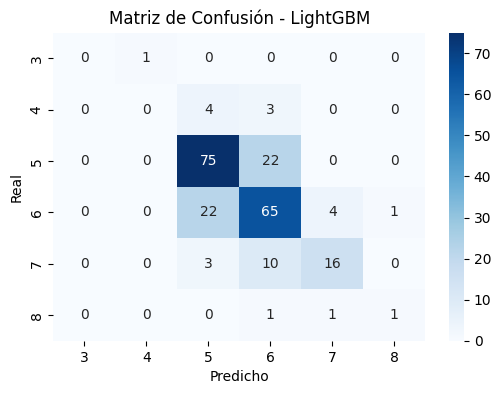


===== Resultados Finales Ordenados por Test Accuracy =====
                     CV Accuracy  Test Accuracy
Modelo                                         
Random Forest           0.643320       0.711790
LightGBM                0.618153       0.685590
Árbol de Decisión       0.526278       0.633188
Regresión Logística     0.587558       0.624454
KNN                     0.530637       0.576419


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


# Cargar el dataset
df = pd.read_csv("4_WineQT.csv")

# Eliminar la columna innecesaria y preparar los datos
df = df.drop(columns=['Id']).copy()
X = df.drop(columns=['quality']).copy()
y = df['quality'].copy()

# División del dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir los modelos a evaluar
modelos = {
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LightGBM': LGBMClassifier(verbose=-1)  # Silencia las advertencias
}

# Definir el pipeline de preprocesamiento y modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normaliza los datos
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))  # Modelo inicial
])

# Función para evaluar modelos y mostrar matrices de confusión
def evaluar_modelos(modelos, X_train, X_test, y_train, y_test, cv=5):
    resultados = []

    # Determinar si el problema es binario o multiclase
    num_clases = len(np.unique(y))
    if num_clases == 2:
        print("\n[INFO] Clasificación Binaria Detectada")
    else:
        print("\n[INFO] Clasificación Multiclase Detectada")

    # Evaluar cada modelo
    for nombre, modelo in modelos.items():
        print(f"\n{'='*40}")
        print(f"Entrenando modelo: {nombre}")

        # Actualizar el modelo en el pipeline
        pipeline.set_params(model=modelo)

        # Evaluación con validación cruzada
        try:
            cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
            mean_accuracy = cv_scores.mean()
            std_accuracy = cv_scores.std()
            print(f"[Validación Cruzada] {nombre} - Accuracy Promedio: {mean_accuracy:.2f} +/- {std_accuracy:.2f}")
        except Exception as e:
            print(f"Error en validación cruzada para {nombre}: {e}")
            mean_accuracy = np.nan
        
        # Entrenar el modelo con el conjunto de entrenamiento
        pipeline.fit(X_train, y_train)

        # Evaluar el modelo en el conjunto de prueba
        y_pred = pipeline.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        print(f"[Evaluación en Prueba] {nombre} - Accuracy en Test: {test_accuracy:.2f}")

        # Calcular la matriz de confusión
        cm = confusion_matrix(y_test, y_pred)

        # Mostrar matriz de confusión con etiquetas
        print(f"\nMatriz de Confusión para {nombre}:")
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.xlabel("Predicho")
        plt.ylabel("Real")
        plt.title(f"Matriz de Confusión - {nombre}")
        plt.show()

        # Guardar los resultados
        resultados.append({'Modelo': nombre, 'CV Accuracy': mean_accuracy, 'Test Accuracy': test_accuracy})

    return pd.DataFrame(resultados).set_index('Modelo')

# Evaluar los modelos
resultados = evaluar_modelos(modelos, X_train, X_test, y_train, y_test)

# Mostrar los resultados ordenados por precisión en conjunto de prueba
resultados_ordenados = resultados.sort_values(by='Test Accuracy', ascending=False)
print("\n===== Resultados Finales Ordenados por Test Accuracy =====")
print(resultados_ordenados)


Con esto, se concluye que Random Forest predice mejor que los demás modelos testeados, tanto en el conjunto de prueba como en el de validación cruzada, por lo tanto, se procederá a optimizar este modelo para ver qué tanto puede mejorar

#### Intento de optimización con GridSearch

Iniciando búsqueda de hiperparámetros con GridSearchCV...

Fitting 5 folds for each of 108 candidates, totalling 540 fits

===== Mejores hiperparámetros encontrados =====
{'model__bootstrap': True, 'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}

===== Resultado de Validación Cruzada (CV Accuracy) =====
Accuracy promedio en validación cruzada (5 folds): 0.6225

===== Evaluación en Conjunto de Prueba (Test Accuracy) =====
Accuracy en test set: 0.6550

===== Matriz de Confusión - Random Forest Optimizado =====


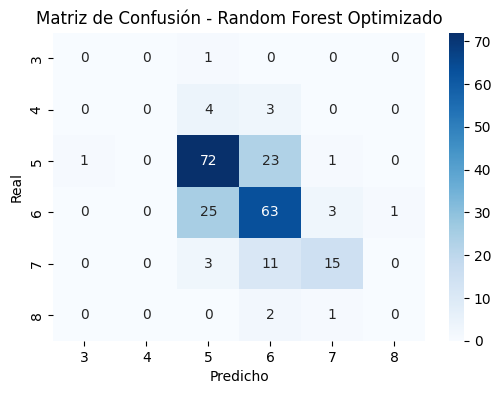

In [120]:
# Definir pipeline con preprocesamiento y modelo Random Forest

# Definir el espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],  # Explorar más árboles para mejorar la estabilidad
    'model__max_depth': [20, 30, 40],        # Probar mayor profundidad para captar mejor las relaciones
    'model__min_samples_split': [2, 5],      # Mantener valores óptimos para evitar sobreajuste
    'model__min_samples_leaf': [1, 2],       # Mantener bajo para evitar pérdida de granularidad
    'model__bootstrap': [True],              # Mantener fijo basado en mejores resultados previos
    'model__max_features': ['sqrt', 'log2', None]  # Probar más estrategias de selección de variables
}




# Aplicar GridSearchCV con validación cruzada de 5 folds
print("Iniciando búsqueda de hiperparámetros con GridSearchCV...\n")
grid_search_rf = GridSearchCV(pipeline, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Obtener mejores hiperparámetros
best_params_rf = grid_search_rf.best_params_
print("\n===== Mejores hiperparámetros encontrados =====")
print(best_params_rf)

# Accuracy de validación cruzada (promedio de los 5 folds)
cv_accuracy_rf = grid_search_rf.best_score_
print(f"\n===== Resultado de Validación Cruzada (CV Accuracy) =====")
print(f"Accuracy promedio en validación cruzada (5 folds): {cv_accuracy_rf:.4f}")

# Evaluar el modelo optimizado en el conjunto de prueba
best_model_rf = grid_search_rf.best_estimator_
y_pred_test = best_model_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_test)

print(f"\n===== Evaluación en Conjunto de Prueba (Test Accuracy) =====")
print(f"Accuracy en test set: {test_accuracy_rf:.4f}")

# Matriz de confusión del modelo optimizado
print("\n===== Matriz de Confusión - Random Forest Optimizado =====")
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest Optimizado")
plt.show()


#### Optimización con RandomizedSearchCV

Iniciando búsqueda de hiperparámetros con RandomizedSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

===== Mejores hiperparámetros encontrados =====
{'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': None, 'model__max_depth': 25, 'model__bootstrap': False}

===== Resultado de Validación Cruzada (CV Accuracy) =====
Accuracy promedio en validación cruzada (5 folds): 0.6225

===== Evaluación en Conjunto de Prueba (Test Accuracy) =====
Accuracy en test set: 0.6550


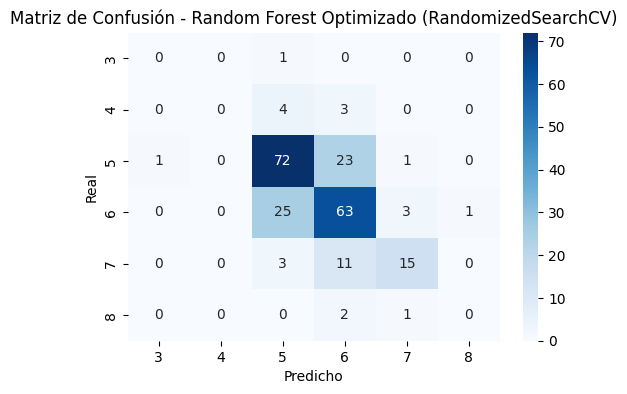

In [122]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Definir el espacio de búsqueda de hiperparámetros ampliado para RandomizedSearchCV
param_dist_rf = {
    'model__n_estimators': [100, 150, 200, 300],    # Mayor rango de árboles
    'model__max_depth': [15, 20, 25, None],         # Explorar profundidad variada
    'model__min_samples_split': [2, 5, 10],         # Diferentes opciones de división
    'model__min_samples_leaf': [1, 2, 4],           # Variar el tamaño mínimo de hoja
    'model__bootstrap': [True, False],              # Probar ambos métodos
    'model__max_features': ['sqrt', 'log2', None]   # Selección de características
}

# Configurar RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    pipeline,                    # Mismo pipeline con estandarización
    param_distributions=param_dist_rf,  # Espacio de búsqueda definido
    n_iter=20,                    # Número de combinaciones a probar (balanceado)
    cv=5,                          # Validación cruzada de 5 folds
    scoring='accuracy',             # Evaluar con precisión
    n_jobs=-1,                      # Usar todos los núcleos disponibles
    verbose=2,                       # Mostrar progreso detallado
    random_state=42                   # Reproducibilidad
)

# Ejecutar la búsqueda aleatoria
print("Iniciando búsqueda de hiperparámetros con RandomizedSearchCV...")
random_search_rf.fit(X_train, y_train)

# Obtener mejores hiperparámetros encontrados
best_params_rf = random_search_rf.best_params_

# Obtener el mejor accuracy de validación cruzada
cv_accuracy_rf = random_search_rf.best_score_

print("\n===== Mejores hiperparámetros encontrados =====")
print(best_params_rf)

print("\n===== Resultado de Validación Cruzada (CV Accuracy) =====")
print(f"Accuracy promedio en validación cruzada (5 folds): {cv_accuracy_rf:.4f}")

# Evaluar el modelo optimizado en el conjunto de prueba
best_model_rf = random_search_rf.best_estimator_
y_pred_test = best_model_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_test)

print("\n===== Evaluación en Conjunto de Prueba (Test Accuracy) =====")
print(f"Accuracy en test set: {test_accuracy_rf:.4f}")

# Mostrar la matriz de confusión del modelo optimizado
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest Optimizado (RandomizedSearchCV)")
plt.show()


#### Optimización con Optuna

[I 2025-01-19 22:22:08,294] A new study created in memory with name: no-name-b5ee5c7e-45ff-4290-9991-707db3d2b829


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-01-19 22:22:10,855] Trial 0 finished with value: 0.6159670930162734 and parameters: {'model__n_estimators': 150, 'model__max_depth': 10, 'model__min_samples_split': 2, 'model__min_samples_leaf': 3, 'model__max_features': 'log2', 'model__bootstrap': True}. Best is trial 0 with value: 0.6159670930162734.
[I 2025-01-19 22:22:13,322] Trial 1 finished with value: 0.6126823995676455 and parameters: {'model__n_estimators': 150, 'model__max_depth': 20, 'model__min_samples_split': 8, 'model__min_samples_leaf': 3, 'model__max_features': 'sqrt', 'model__bootstrap': False}. Best is trial 0 with value: 0.6159670930162734.
[I 2025-01-19 22:22:15,156] Trial 2 finished with value: 0.609409715967093 and parameters: {'model__n_estimators': 100, 'model__max_depth': 10, 'model__min_samples_split': 8, 'model__min_samples_leaf': 3, 'model__max_features': None, 'model__bootstrap': True}. Best is trial 0 with value: 0.6159670930162734.
[I 2025-01-19 22:22:17,019] Trial 3 finished with value: 0.6116135

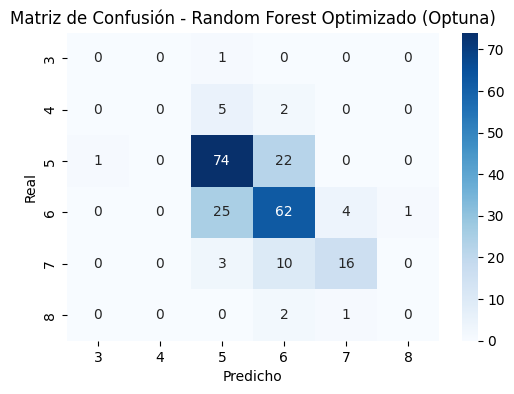

In [125]:
import optuna
from sklearn.metrics import accuracy_score, confusion_matrix

# Función objetivo para Optuna
def objective(trial):
    # Espacio de búsqueda de hiperparámetros
    params = {
        'model__n_estimators': trial.suggest_int('model__n_estimators', 50, 300, step=50),
        'model__max_depth': trial.suggest_int('model__max_depth', 10, 30, step=5),
        'model__min_samples_split': trial.suggest_int('model__min_samples_split', 2, 10, step=2),
        'model__min_samples_leaf': trial.suggest_int('model__min_samples_leaf', 1, 4),
        'model__max_features': trial.suggest_categorical('model__max_features', ['sqrt', 'log2', None]),
        'model__bootstrap': trial.suggest_categorical('model__bootstrap', [True, False])
    }
    
    # Configurar el pipeline con los hiperparámetros sugeridos
    pipeline.set_params(**params)
    
    # Evaluar con validación cruzada
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    return scores.mean()

# Ejecutar la optimización con Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, timeout=900, show_progress_bar=True)  # 30 intentos o 15 minutos máximo

# Obtener los mejores hiperparámetros encontrados
best_params_optuna = study.best_params
print("\n===== Mejores hiperparámetros encontrados con Optuna =====")
print(best_params_optuna)

# Evaluar el modelo optimizado en el conjunto de prueba
pipeline.set_params(**best_params_optuna)
pipeline.fit(X_train, y_train)
y_pred_optuna = pipeline.predict(X_test)
test_accuracy_optuna = accuracy_score(y_test, y_pred_optuna)

# Resultados detallados
print("\n===== Resultado de Validación Cruzada (CV Accuracy) =====")
print(f"Mejor accuracy en validación cruzada: {study.best_value:.4f}")

print("\n===== Evaluación en Conjunto de Prueba (Test Accuracy) =====")
print(f"Accuracy en test set: {test_accuracy_optuna:.4f}")

# Matriz de confusión
cm_optuna = confusion_matrix(y_test, y_pred_optuna)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_optuna, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest Optimizado (Optuna)")
plt.show()


#### Conclusión

El modelo de Random Forest se destacó como el mejor entre todos los modelos evaluados en este estudio, superando a alternativas como la regresión logística, KNN, árboles de decisión y LightGBM. Sus características de ensamblado, la capacidad de manejar relaciones no lineales y su robustez frente al sobreajuste permitieron alcanzar un balance óptimo entre sesgo y varianza, logrando el mejor rendimiento tanto en la validación cruzada como en el conjunto de prueba. La combinación de múltiples árboles de decisión ayudó a capturar patrones complejos en los datos y mejorar la generalización del modelo.

A pesar de los esfuerzos de optimización mediante técnicas como GridSearchCV y RandomizedSearchCV, los hiperparámetros predeterminados del modelo Random Forest lograron mayores valores de accuracy en el conjunto de prueba. Esto sugiere que los valores por defecto de Scikit-learn están bien ajustados para el presente dataset, posiblemente debido a una combinación adecuada de profundidad de los árboles y número de estimadores que maximizan la capacidad predictiva sin incurrir en sobreajuste. Además, la optimización pudo haber explorado combinaciones de hiperparámetros que no fueron las más adecuadas para el tamaño y características específicas del conjunto de datos, lo que resalta la importancia de realizar ajustes cuidadosos sin perder la generalización.